<a href="https://colab.research.google.com/github/anishjohnson/Airbnb-Booking-Analysis/blob/main/Airbnb_Bookings_Analysis_Anish_johnson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

.

## **Import the required libraries and data.**

In [1]:
# Import the libraries that will be used.
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 7)
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import data by mounting the google drive.
from google.colab import drive
drive.mount('/content/drive')

# Load the data
airbnb_data = pd.read_csv('/content/drive/MyDrive/Capstone data files/Airbnb NYC 2019.csv')

Mounted at /content/drive


In [100]:
# First look at our data.
airbnb_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


> ***Well the dataframe contains numerical as well as categorical features!***

> ***But how many of these features are categorical and how many are numerical?, and what about the number of rows and columns?***

> ***And does the data contain any null values?***

> ***Lets find out...🔍***



In [101]:
# Find out the shape of our data.
airbnb_data.shape

(38821, 16)

In [102]:
# Lets get some info regarding this data.
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38821 non-null  int64  
 1   name                            38821 non-null  object 
 2   host_id                         38821 non-null  int64  
 3   host_name                       38821 non-null  object 
 4   neighbourhood_group             38821 non-null  object 
 5   neighbourhood                   38821 non-null  object 
 6   latitude                        38821 non-null  float64
 7   longitude                       38821 non-null  float64
 8   room_type                       38821 non-null  object 
 9   price                           38821 non-null  int64  
 10  minimum_nights                  38821 non-null  int64  
 11  number_of_reviews               38821 non-null  int64  
 12  last_review                     

In [103]:
# Check for null values.
airbnb_data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

*From the above observation we can see:*
1. *There are **48895 Rows** and **16 Columns**,*
2. *Out of which **10 are numerical** and **6 are categorical** fetures.*
3. *There are few columns with null values present in them which needs to be removed.*

In [104]:
# Droping the null values.
airbnb_data.dropna(inplace=True)

In [105]:
# Recheck the shape.
airbnb_data.shape

(38821, 16)

In [106]:
airbnb_data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

***Good!! now that we have dropped the null values lets take a look at some statistics about our data.***

In [107]:
# Describe our data.
airbnb_data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.882100e+04,3.882100e+04,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,1.810081e+07,6.424582e+07,40.728129,-73.951149,142.332526,5.869220,29.290255,1.373229,5.166611,114.886299
std,1.069372e+07,7.589752e+07,0.054991,0.046693,196.994756,17.389026,48.182900,1.680328,26.302954,129.529950
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,8.721444e+06,7.029525e+06,40.688640,-73.982460,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,1.887286e+07,2.837092e+07,40.721710,-73.954810,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,2.756746e+07,1.018905e+08,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


*Ooops!!🤔*
> *The above table shows that the **minimum_nights stayed is 1 and the** **minimum price payed is 0$**, which is impossible unless Airbnb plans to provide rooms free of cost.* 

> *Which indirectly means that there exist few rows in which the value for minimum_nights is 1 and the respective rent(price) paid is 0.*

> *Inorder to solve this we will have to replace these rows with the average of the minimum prices paid for 1 night multiplied by the total nights stayed, i.e **[price = avg(min_prices)x(total_nights_stayed)]**, therefore lets assume that the minimum prices to be paid for 1 night ranges between (0-100) and get an average of all the prices less than 100$.*



In [108]:
# Lets make a copy of our dataset before making any changes.
airbnb_data_copy = airbnb_data.copy()

In [109]:
# First get the columns with price = 0.
airbnb_data_copy[airbnb_data_copy['price']==0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333
26866,21304320,Best Coliving space ever! Shared room.,101970559,Sergii,Brooklyn,Bushwick,40.69166,-73.90928,Shared room,0,30,5,2019-05-24,0.26,6,139


In [110]:
# Second get the average of minimum prices paid.
min_avg_price = round(airbnb_data_copy.loc[airbnb_data_copy['price'] < 100, 'price'].mean())
min_avg_price

65

In [111]:
# Third replace the price = 0 with min_avg_price.
airbnb_data_copy['price'] = np.where((airbnb_data_copy['price'] == 0),
                                     (min_avg_price*airbnb_data_copy['minimum_nights']),
                                     airbnb_data_copy['price'])

In [112]:
# Finally check if the prices have been replaced or not.
airbnb_data_copy[airbnb_data_copy['price']==0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


.

***Yuhooo!!*** *🙌*
***we have successfull replaced the rows with price = 0***. 

***Lets get the statistics again.*** *📊*

In [113]:
airbnb_data_copy.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.882100e+04,3.882100e+04,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,1.810081e+07,6.424582e+07,40.728129,-73.951149,142.463126,5.869220,29.290255,1.373229,5.166611,114.886299
std,1.069372e+07,7.589752e+07,0.054991,0.046693,197.412608,17.389026,48.182900,1.680328,26.302954,129.529950
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,8.721444e+06,7.029525e+06,40.688640,-73.982460,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,1.887286e+07,2.837092e+07,40.721710,-73.954810,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,2.756746e+07,1.018905e+08,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


.

***Now lets bring in the charts and diagrams to understand our data better.*** *📈📉📊*

# ***EDA:***

In [114]:
# Start by getting the numeric and categorical features.

numeric_features = airbnb_data_copy.describe().columns

categorical_fetures = airbnb_data_copy.describe(exclude=[int, float]).columns

print('Numeric Features:',list(numeric_features))
print('_'*185)
print('Categorical Features:',list(categorical_fetures))

Numeric Features: ['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
_________________________________________________________________________________________________________________________________________________________________________________________
Categorical Features: ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']


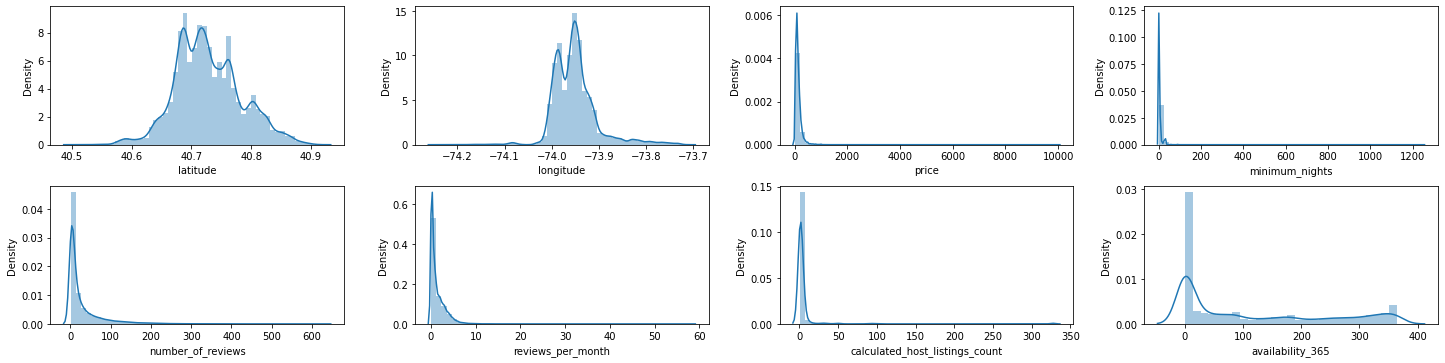

In [115]:
# Lets check out the numeric_features to understand their distributions.

names = numeric_features.values[2:]
ncols = 4
fig, axes = plt.subplots(2,ncols, figsize=(20,5))
fig.tight_layout(h_pad=2, w_pad=4)

for name, ax in zip(names, axes.flatten()):
    sns.distplot(airbnb_data_copy[name], ax=ax)
    
plt.show()

.

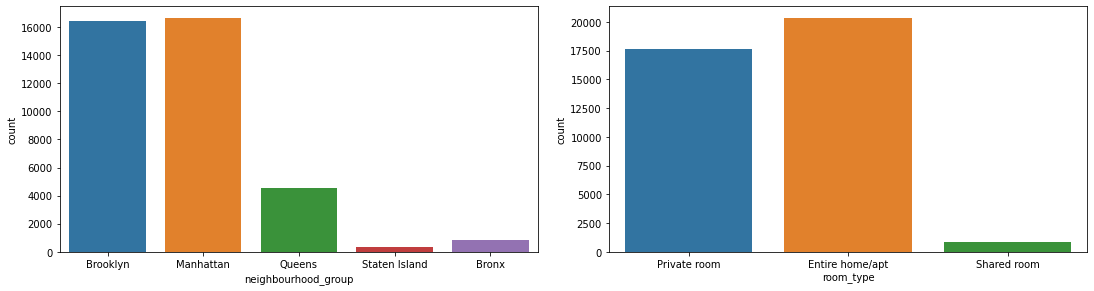

In [137]:
# Checkout few categorical features. (exclude 'name', 'host_name', 'last_review', 'neighbourhood' as these type of data contain high cardinality)

names = categorical_fetures.values[2:5:2]
ncols = 2
fig, axes = plt.subplots(1,ncols, figsize=(15,4))
fig.tight_layout(h_pad=2, w_pad=4)

for name, ax in zip(names, axes.flatten()):
    sns.countplot(airbnb_data_copy[name], ax=ax)
    
plt.show()

In [138]:
# Get the one-hot-encoding done for the above two categorical features.
airbnb_data_copy = pd.get_dummies(airbnb_data_copy, columns=['neighbourhood_group', 'room_type'])

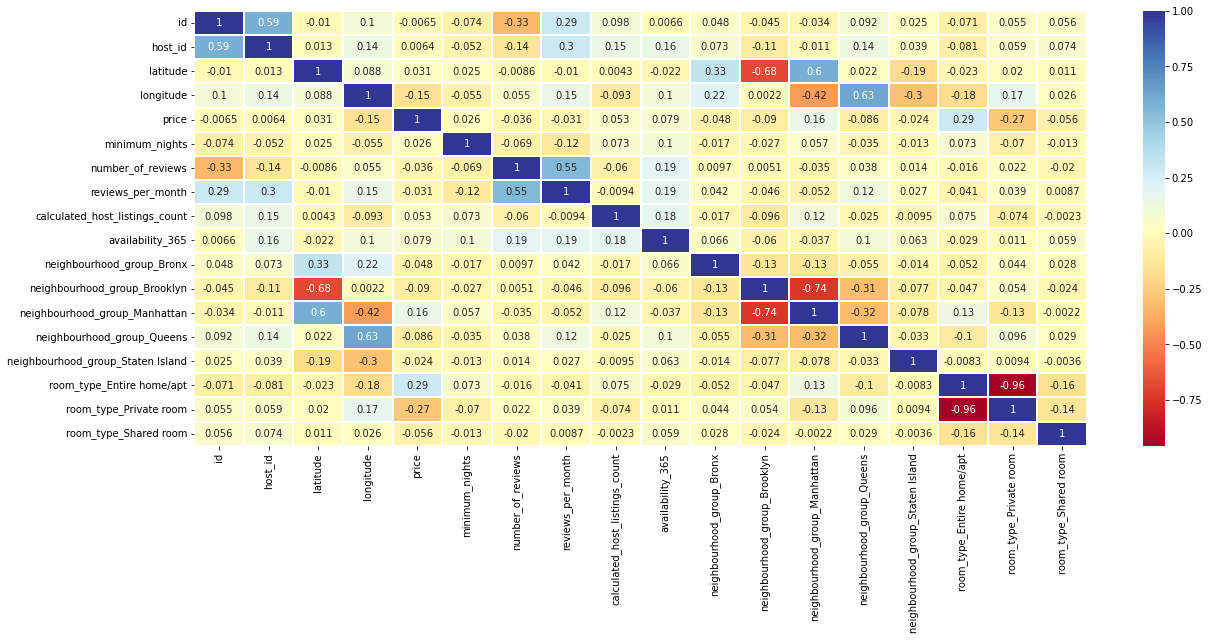

In [139]:
# Now lets check for multicolinearity.
correlation = airbnb_data_copy.corr()
fig = plt.figure(figsize=(20,8))
sns.heatmap(correlation, annot=True, linewidths=1, cmap='RdYlBu')

In [140]:
# Now that we have come this far lets make sure if our data contains any outliers.
# Create a dataset copy for the numeric_features.
df = airbnb_data_copy[numeric_features[2:]]

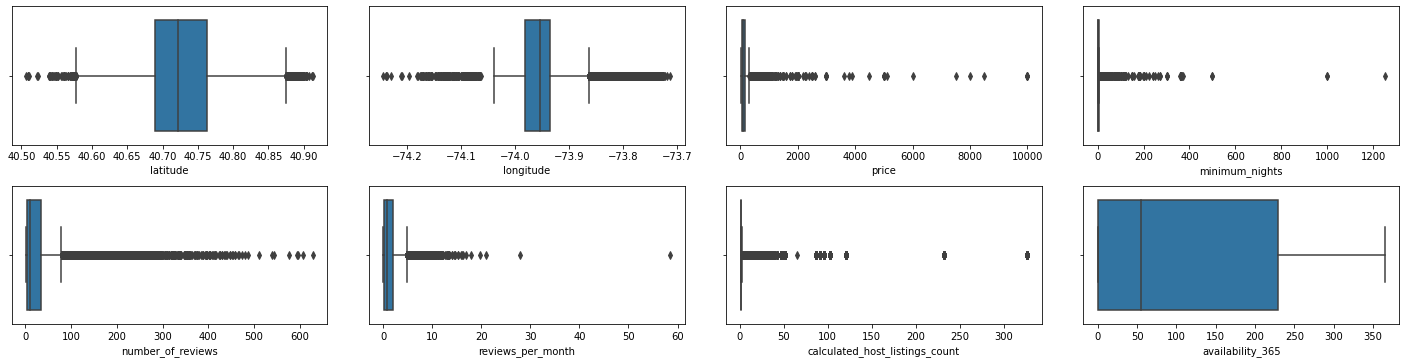

In [141]:
# Plot boxplots to find outliers distribution.
names = df.columns
ncols = 4
fig, axes = plt.subplots(2,ncols, figsize=(20,5))
fig.tight_layout(h_pad=2)

for name, ax in zip(names, axes.flatten()):
    sns.boxplot(x=name, data=df, ax=ax)
    
plt.show()

***Now what stories do these charts & diagrams tell us.....lets see*** *👀*

1. Distributions and skewnwss of our numeric_features:
> From the distplots it can be observed that most of the numeruc_features are positively skewed, whereas latitude and longitude data seem somewhat normally distributed. This indicates that these features have to be transformed inorder to remove the skewness.

 > **Below are the some type of method or way to deal above type of problem.**

        square-root for moderate skew : sqrt(x) for positively skewed data, sqrt(max(x+1) - x) for negatively skewed data

        log for greater skew : log10(x) for positively skewed data, log10(max(x+1) - x) for negatively skewed data

        inverse for severe skew : 1/x for positively skewed data 1/(max(x+1) - x) for negatively skewed data

2. Most prefered neighbourhood_group and room type.
> Barplots for the categorical_features (neighbourhood_group and room type) show that the most preferd neighbourhood_groups are **Brooklyn** and **Manhatan** whereas the most prefered room_type are either a **Private room** or an **Entire Home/Apt**.

3. Correlation between the variables.
```
id is highly correlated with host_id
number_of_reviews is highly correlated with reviews_per_month
latitude and longitude are highly correlated with different neighbourhood_groups
```

4. Outliers!!
> The boxplots indicate that the features contain mild as well as extreme outliers present which can be treated either using the IQR or the Z-score.